# Análise da evolução dos preços de conbustíveis automotivos no Brasil de _07/2001_ até _04/2018_

## José Elvano Moraes

> Trabalho em estágio muito precoce. Fontes de dados serão descritas (Banco central do Brasil, Quandl (quandl.com), dentre outtros, assim como seráo incluído os scripts para aquisição automatizada e preparação dos dados. __Os (poucos) gráficos `ainda` estão sem explicações__ 

-----

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import statsmodels.api as sm
import quandl
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('./serie_deflacionada_igpm.csv')

In [3]:
df.head()

,MES,PRODUTO,NUMERO_DE_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PRECO_MEDIO_REVENDA,DESVIO_PADRAO_REVENDA,PRECO_MINIMO_REVENDA,PRECO_MAXIMO_REVENDA,MARGEM_MEDIA_REVENDA,COEF_DE_VARIACAO_REVENDA,PRECO_MEDIO_DISTRIBUICAO,DESVIO_PADRAO_DISTRIBUICAO,PRECO_MINIMO_DISTRIBUICAO,PRECO_MAXIMO_DISTRIBUICAO,COEF_DE_VARIACAO_DISTRIBUICAO,PRECO_MEDIO_REVENDA_DEFLACIONADO
1,2001-07-31,GASOLINA,18708,R$/l,1.681,0.099,1.379,2.00,0.214,0.059,1.467,0.076,0.895,1.791,0.052,5.545614
2,2001-08-31,GASOLINA,29950,R$/l,1.711,0.092,1.440,2.38,0.207,0.054,1.504,0.052,1.023,1.750,0.034,5.308302
3,2001-09-30,GASOLINA,34530,R$/l,1.718,0.100,1.430,2.38,0.214,0.058,1.504,0.054,1.009,1.821,0.036,5.288426
4,2001-10-31,GASOLINA,44072,R$/l,1.779,0.105,1.410,2.48,0.242,0.059,1.537,0.062,1.023,1.868,0.041,5.466524
5,2001-11-30,GASOLINA,36267,R$/l,1.780,0.106,1.440,2.45,0.229,0.059,1.552,0.061,1.080,1.910,0.039,5.432747


In [4]:
presidentes = pd.read_csv('../presidentes/presidentes.csv')
cafe_usd = pd.read_csv('../CEPEA-COFFEE_A.csv')
cafe_usd = pd.read_csv('../CEPEA-COFFEE_A.csv')

In [6]:
indices_economicos_br = pd.read_csv('../STI-20180617152617216.csv', sep=';')

In [23]:
data_idx_econ_br = [
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27574 - COMMODITY INDEX - BRAZIL - INDEX'],
        name='Index'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27575 - COMMODITY INDEX - BRAZIL - AGRICULTURE - INDEX'],
        name='Agricultura'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27576 - COMMODITY INDEX - BRAZIL - METAL - INDEX'],
        name='Metal'
    ),
    go.Scatter(
        x=indices_economicos_br['DATE'], # assign x as the dataframe column 'x'
        y=indices_economicos_br['27577 - COMMODITY INDEX - BRAZIL - ENERGY - INDEX'],
        name='Energia'
    )
]

layout = go.Layout(
    title='Brazilian economic commodity Index',
    yaxis=dict(title='Preço (Falta unidades)'),
    xaxis=dict(title='Data')
)

fig = go.Figure(data=data_idx_econ_br, layout=layout)
py.iplot(fig, filename='file_data_idx_econ_br')

-------

In [8]:
##
gas_defl = df[df.PRODUTO == 'GASOLINA']
diesel_defl = df[df.PRODUTO == 'OLEO_DIESEL']
etanol_defl = df[df.PRODUTO == 'ETANOL_HIDRATADO']
gnv_defl = df[df.PRODUTO == 'GNV']

data_nDefl = [
    go.Scatter(
        x=gas_defl['MES'], # assign x as the dataframe column 'x'
        y=gas_defl['PRECO_MEDIO_REVENDA'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel_defl['MES'], # assign x as the dataframe column 'x'
        y=diesel_defl['PRECO_MEDIO_REVENDA'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol_defl['MES'], # assign x as the dataframe column 'x'
        y=etanol_defl['PRECO_MEDIO_REVENDA'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv_defl['MES'], # assign x as the dataframe column 'x'
        y=gnv_defl['PRECO_MEDIO_REVENDA'],
        name='GNV'
    )
]

#
layout_nDefl = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis. Sem Correção para Inflação',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Data')
)

#
fig_nDefl = go.Figure(data = data_nDefl, layout = layout_nDefl)

#
py.iplot(fig_nDefl, filename='line-plot-title_nDefl')

## Evolução de ativos como GOOGLE, FACEBOOK, AMAZON

In [26]:
GOOG = pd.read_csv('../stocks/GOOG.csv')
AAPL = pd.read_csv('../stocks/AAPL.csv')
NFLX = pd.read_csv('../stocks/NFLX.csv')
AMZN = pd.read_csv('../stocks/AMZN.csv')

In [32]:
GOOG.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ_CLOSE,VOLUME
162,2018-02-01,1162.609985,1174.000000,992.559998,1104.729980,1104.729980,42384100
163,2018-03-01,1107.869995,1177.050049,980.640015,1031.790039,1031.790039,45353300
164,2018-04-01,1022.820007,1094.165039,990.369995,1017.330017,1017.330017,41715900
165,2018-05-01,1013.659973,1110.750000,1006.289978,1084.989990,1084.989990,31800500
166,2018-06-01,1099.349976,1155.469971,1098.500000,1152.260010,1152.260010,17434900


In [ ]:
##
gas_defl = df[df.PRODUTO == 'GASOLINA']

data_nDefl = [
    go.Scatter(
        x=gas_defl['MES'], # assign x as the dataframe column 'x'
        y=gas_defl['PRECO_MEDIO_REVENDA'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel_defl['MES'], # assign x as the dataframe column 'x'
        y=diesel_defl['PRECO_MEDIO_REVENDA'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol_defl['MES'], # assign x as the dataframe column 'x'
        y=etanol_defl['PRECO_MEDIO_REVENDA'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv_defl['MES'], # assign x as the dataframe column 'x'
        y=gnv_defl['PRECO_MEDIO_REVENDA'],
        name='GNV'
    )
]

#
layout_nDefl = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis. Sem Correção para Inflação',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Data')
)

#
fig_nDefl = go.Figure(data = data_nDefl, layout = layout_nDefl)

#
py.iplot(fig_nDefl, filename='line-plot-title_nDefl')

-----

In [9]:
##
gas = df[df.PRODUTO == 'GASOLINA']
diesel = df[df.PRODUTO == 'OLEO_DIESEL']
etanol = df[df.PRODUTO == 'ETANOL_HIDRATADO']
gnv = df[df.PRODUTO == 'GNV']

data = [
    go.Scatter(
        x=gas['MES'], # assign x as the dataframe column 'x'
        y=gas['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel['MES'], # assign x as the dataframe column 'x'
        y=diesel['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol['MES'], # assign x as the dataframe column 'x'
        y=etanol['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv['MES'], # assign x as the dataframe column 'x'
        y=gnv['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='GNV'
    )
]

#
layout = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis. Inflação do Período Corrigida pelo Índice IGP-M para data de ___/___/___',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Data')
)

#
fig = go.Figure(data=data, layout=layout)

#
py.iplot(fig, filename='line-plot-title')

----

In [10]:
#
# etanol_series = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
# tmp = sm.tsa.stattools.acf(etanol_series, nlags=200)
# auto_corr_etanol = np.array(tmp)]
# #
# gasolina_series = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
# tmp2 = sm.tsa.stattools.acf(gasolina_series, nlags=200)
# auto_corr_gasolina = np.array(tmp2)

In [11]:
#
nLAGS = 200
#
etanol_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA)
tmp_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(etanol_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_etanol_autocorr_fuels_no_monetary_correction = np.array(tmp_autocorr_fuels_no_monetary_correction)
#

gasolina_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA)
tmp2_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(gasolina_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_gasolina_autocorr_fuels_no_monetary_correction = np.array(tmp2_autocorr_fuels_no_monetary_correction)


#
diesel_series_autocorr_fuels_no_monetary_correction = pd.Series(df[df.PRODUTO == 'OLEO_DIESEL'].PRECO_MEDIO_REVENDA)
tmp3_autocorr_fuels_no_monetary_correction = sm.tsa.stattools.acf(diesel_series_autocorr_fuels_no_monetary_correction, nlags=nLAGS)
auto_corr_diesel_autocorr_fuels_no_monetary_correction = np.array(tmp3_autocorr_fuels_no_monetary_correction)


#
data_auto_corr_fuels_no_monetary_correction = [
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_etanol_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_etanol_autocorr_fuels_no_monetary_correction,
        name = 'Etanol'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_gasolina_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_gasolina_autocorr_fuels_no_monetary_correction,
        name = 'Gasolina'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_diesel_autocorr_fuels_no_monetary_correction.size),
        y = auto_corr_diesel_autocorr_fuels_no_monetary_correction,
        name = 'Diesel'
    )
    
]

#
layout_autocorr_fuels_no_monetary_correction = go.Layout(
    title='Função de Autorrelação para Série Histórica de Combustíveis. Nenhuma Correção Monetária Aplicada',
    yaxis=dict(title='Índice de Autocorrelação'),
    xaxis=dict(title='LAG')
)

fig_autocorr_fuels_no_monetary_correction = go.Figure(data = data_auto_corr_fuels_no_monetary_correction, layout = layout_autocorr_fuels_no_monetary_correction)
py.iplot(fig_autocorr_fuels_no_monetary_correction, filename='file_autocorr_fuels_no_monetary_correction')

In [12]:
#
nLAGS = 200
#
etanol_series = pd.Series(df[df.PRODUTO == 'ETANOL_HIDRATADO'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp = sm.tsa.stattools.acf(etanol_series, nlags=nLAGS)
auto_corr_etanol = np.array(tmp)
#

gasolina_series = pd.Series(df[df.PRODUTO == 'GASOLINA'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp2 = sm.tsa.stattools.acf(gasolina_series, nlags=nLAGS)
auto_corr_gasolina = np.array(tmp2)


#
diesel_series = pd.Series(df[df.PRODUTO == 'OLEO_DIESEL'].PRECO_MEDIO_REVENDA_DEFLACIONADO)
tmp3 = sm.tsa.stattools.acf(diesel_series, nlags=nLAGS)
auto_corr_diesel = np.array(tmp3)


#
data_auto_corr = [
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_etanol.size),
        y = auto_corr_etanol,
        name = 'Etanol'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_gasolina.size),
        y = auto_corr_gasolina,
        name = 'Gasolina'
    ),
    go.Scatter(
        x = np.linspace(0, 1, auto_corr_diesel.size),
        y = auto_corr_diesel,
        name = 'Diesel'
    )
    
]

#
layout_data_auto_corr = go.Layout(
    title='Função de Autorrelação para Série Histórica de Combustíveis. Inflação do Período Corrigida pelo Índice IGP-M para data de ___/___/___',
    yaxis=dict(title='AUTORRELATION INDEX'),
    xaxis=dict(title='LAG')
)

fig = go.Figure(data = data_auto_corr, layout = layout_data_auto_corr)
py.iplot(fig, filename='file_autocorr_fuels_igp_m_monetary_correction')

In [13]:
# pd.plotting.autocorrelation_plot(serie_etanol);
# pd.plotting.autocorrelation_plot(gaso);
# pd.plotting.autocorrelation_plot(diesilo);

-----

In [14]:
#
t = np.linspace(0, 1, nLAGS)

fft_etanol = np.abs(np.fft.fft(auto_corr_etanol))**2

freq = np.fft.fftfreq(t.shape[-1])

In [15]:
#
dd = [
        go.Scatter(
        x = t,
        y = fft_etanol,
        name = 'FFT Etanol'
     )
]


#
ddl = go.Layout(
    title='FFT',
    yaxis=dict(title='Frequência'),
    xaxis=dict(title='Intensidade (unids arbitrárias)')
)


#
fig_ = go.Figure(data = dd, layout=ddl)
py.iplot(fig_, filename='ddfft_file_data_idx_econ_br')

-----

In [19]:

from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt

dt = 0.001
X = fft(etanol['PRECO_MEDIO_REVENDA'])
freq = fftfreq(X.size, d=dt)

# Only keep positive frequencies.
keep = freq>=0
X = X[keep]
freq = freq[keep]

###
dd = [
        go.Scatter(
        x = freq,
        y = fft_etanol,
        name = 'FFT Etanol'
     )
]


#
ddl = go.Layout(
    title='FFT',
    yaxis=dict(title='Frequência'),
    xaxis=dict(title='Intensidade (unids arbitrárias)')
)


#
fig_ = go.Figure(data = dd, layout=ddl)
py.iplot(fig_, filename='ddfft_file_data_idx_econ_br')

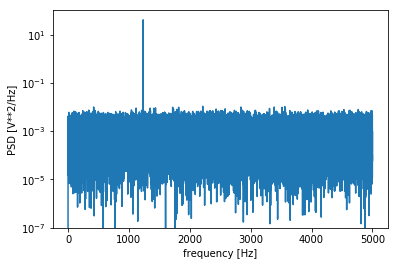

In [18]:
from scipy import signal
import matplotlib.pyplot as plt


fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)


f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()